## COLOUR Histogramme Test

In [1]:
%matplotlib inline
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2


# Test Image
#file = '"D://Organisation//07-Uni//06-Auslandsstudium//02-École Centrale de Marseille//04-3A//03-OMIS//02-Projet//03-jeux-de-données//Caltech//airplanes//image_0001.jpg'"
#path = u"D:\\Organisation\\07-Uni//06-Auslandsstudium//02-École Centrale de Marseille//image_0002.jpg"
path = "D:/Caltech//airplanes//image_0304.jpg"
#path = "./Test/vert.jpg"

# load the image and show it
#cv2.startWindowThread()
image = cv2.imread(path)
cv2.imshow("image", image)
cv2.waitKey(0) 


-1

flattened feature vector size: 48


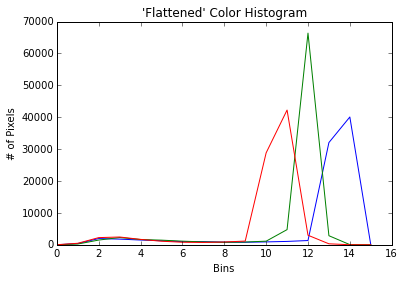

In [8]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and
    # concatenate the resulting histograms for each
    # channel
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    features.extend(hist)
 
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
 
# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values -- in practice, we would
# normally not use 256 bins for each channel, a choice
# between 32-96 bins are normally used, but this tends
# to be application dependent
print "flattened feature vector size: %d" % (np.array(features).flatten().shape)

In [14]:
print features[10:33]

[array([ 906.], dtype=float32), array([ 1061.], dtype=float32), array([ 1339.], dtype=float32), array([ 32064.], dtype=float32), array([ 40083.], dtype=float32), array([ 36.], dtype=float32), array([ 4.], dtype=float32), array([ 245.], dtype=float32), array([ 1488.], dtype=float32), array([ 2275.], dtype=float32), array([ 1658.], dtype=float32), array([ 1456.], dtype=float32), array([ 1140.], dtype=float32), array([ 910.], dtype=float32), array([ 785.], dtype=float32), array([ 870.], dtype=float32), array([ 1137.], dtype=float32), array([ 4761.], dtype=float32), array([ 66385.], dtype=float32), array([ 2850.], dtype=float32), array([ 52.], dtype=float32), array([ 12.], dtype=float32), array([ 28.], dtype=float32)]


<matplotlib.colorbar.Colorbar instance at 0x000000001C016608>

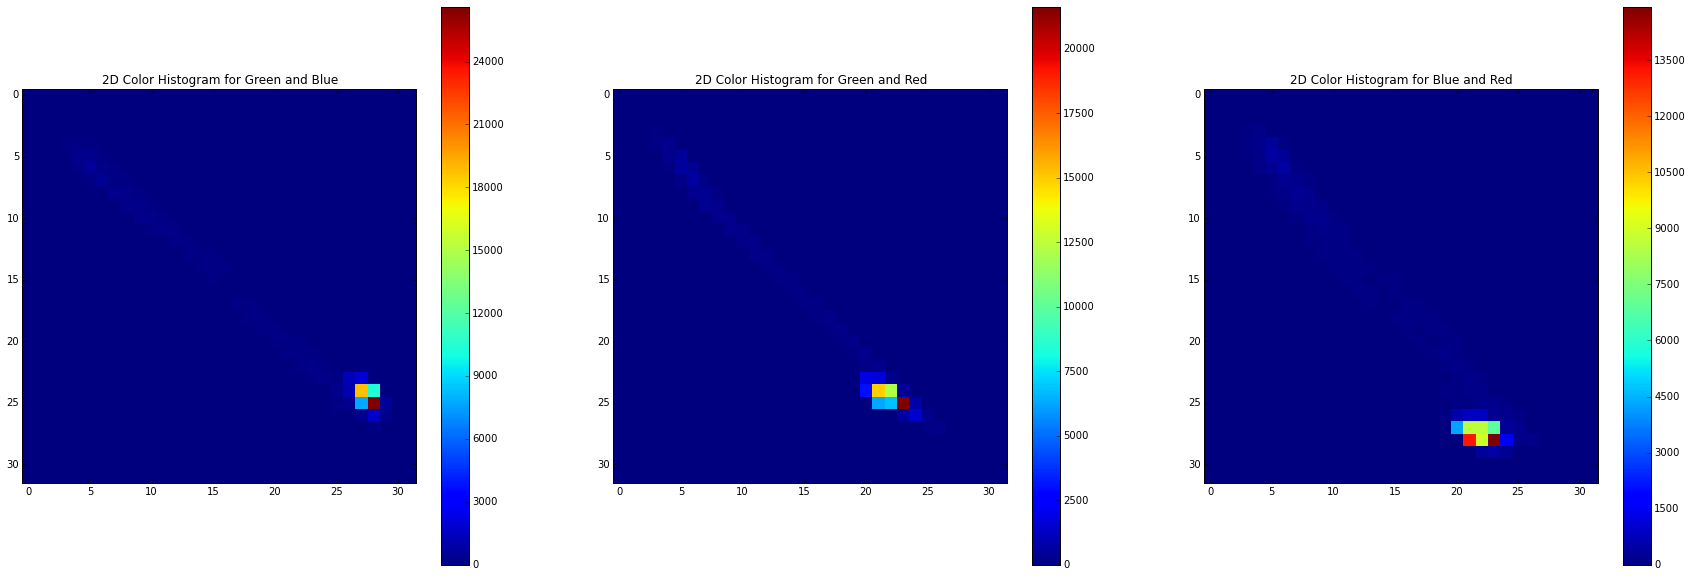

In [45]:
# let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure(figsize=(30,10))

# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Blue")
plt.colorbar(p)
 
# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Green and Red")
plt.colorbar(p)
 
# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for Blue and Red")
plt.colorbar(p)


 
# finally, let's examine the dimensionality of one of
# the 2D histograms
#print "2D histogram shape: %s, with %d values" % (
#	hist.shape, hist.flatten().shape[0])